In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import scatterplot
from sklearn import neighbors
from sklearn import datasets
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metr
from sklearn import preprocessing
import math
from sklearn.metrics import accuracy_score
from sklearn.metrics import zero_one_loss
from sklearn.neighbors import KNeighborsClassifier
from prettytable import PrettyTable

In [57]:
path1= 'C:\\Users\\HP\\Desktop\\EE559\\HW1\\vertebral_column_data'
path=path1+'/column_2C.dat'                                                       # create dirtory
data = pd.read_table(path,header=None,sep='\s+')
data.columns = ['PI','PT','LLA','SS','PR','GOS','class']                        # change the columns'name of DATAFRAME
n = range(10,220,10)

In [58]:
def train_test_sample(num):
    num_AB = (int)(2*num/3)
    num_NO = (int)(num/3)
#   print(num_AB,num_NO)
    train_AB = data.loc[data['class'] == 'AB'].head(num_AB)
    train_NO = data.loc[data['class'] == 'NO'].head(num_NO)
    train = train_NO.append(train_AB)
    # print (train.shape)
    test_AB = data.loc[data['class'] == 'AB'][num_AB:]
    test_NO = data.loc[data['class'] == 'NO'][num_NO:]
    test = test_NO.append(test_AB)
    # print (test.shape)
    return train,test

In [59]:
def knn( X_train,X):
    num_test = X.shape[0]
    num_train = X_train.shape[0]
    dists = np.zeros((num_test, num_train))
    dists = np.multiply(np.dot(X, X_train.T), -2)
    sq1 = np.sum(np.square(X), axis=1, keepdims=True)
    sq2 = np.sum(np.square(X_train), axis=1)
    dists = np.add(dists, sq1)
    dists = np.add(dists, sq2)
    dists = dists.astype('float32')
    dists = np.sqrt(dists)
    return dists

In [60]:
def predict_labels(dists, y_train,k=1):
    num_test = dists.shape[0]
    y_pred = np.zeros(num_test)
    for i in range(num_test):
        closest_y = np.array(y_train)[np.argsort(dists[i])[:k]]
        y_pred[i] = np.argmax(np.bincount(closest_y))
    return y_pred

In [61]:
def data_preprocessing(train,test): # make train and test sample
    train1 = train.values
    train_1 = np.delete(train1,6,axis =1)
    y_train = []
    y_test  = []

    for i in range(train1.shape[0]):
        if train1[i][6] == 'AB':
            y_train.append(1)
        elif train1[i][6] == 'NO':
            y_train.append(0)
        else:
            break

    test1 = test.values
    test_1 = np.delete(test1,6,axis =1)
    for i in range(test1.shape[0]):
        if test1[i][6] == 'AB':
            y_test.append(1)
        elif test1[i][6] == 'NO':
            y_test.append(0)
        else:
            break
    return y_train,y_test,train_1,test_1

In [62]:
def result_deduction(y_test,y_pred_best):
    C2 = confusion_matrix(y_test, y_pred_best, labels=None, sample_weight=None)
    print ('The confusion matrix is')
    print (C2)
    TP = C2[0][0]
    TN=  C2[1][1]
    FP=  C2[1][0]
    FN=  C2[0][1]
    TPR = TP /(TP + FN)
    TNR = TN /(TN + FP)
    precision = TP/(TP+FP)
    recall=TP/(TP+FN)
    f1_score = 2*precision * recall/(precision + recall )
    print ('The Ture positive rate is %f'%(TPR))
    print ('The Ture negative rate is %f'%(TNR))
    print ('precision is %f'%(precision))
    print ('The f1 score is %f'%(f1_score))
    plt.figure()
    sns.heatmap(C2, annot=True)

In [63]:
def find_error(train,test,k_ = range(1,211,3)):
    y_train,y_test,train_1,test_1  = data_preprocessing(train,test)
    dists = knn(train_1 ,test_1 )
    final_result = []
    a = b =0
    a_1 = b_1 = 0
    for i in range(len(k_)):
        a = b = 0
        y_pred = predict_labels(dists,y_train,k = k_[i])
        for j in range(len(y_pred)):
            if y_pred[j] == y_test[j]:
                a = a + 1
            elif y_pred[j] != y_test[j]:
                b = b + 1
            else:
                break
        accuracy = a/(a+b)
        error    = b/(a+b)
        # print('Got %d / %d error rate: %f, when k is %d' % (a, len(y_pred), error,k_[i]))
        final_result.append(error)
    # plt.errorbar(k_, final_result)
    # plt.title('test of K')
    # plt.xlabel('K')
    # plt.ylabel('Accuracy')
    best_k = k_[final_result.index(min(final_result ))]
    y_pred_best = predict_labels(dists,y_train,k = best_k)  # predict value [.......]

    for j in range(len(y_pred_best)):
        if y_pred_best[j] == y_test[j]:
            a_1 = a_1 + 1
        elif y_pred_best[j] != y_test[j]:
            b_1 = b_1 + 1
        else:
            break
    error_lowest = b_1 / (a_1 + b_1)
    # print ('The best k is %d and the lowest error is %f' %(best_k,error_lowest))
    return error_lowest,best_k,y_pred_best

The answer of the (b-1) is 


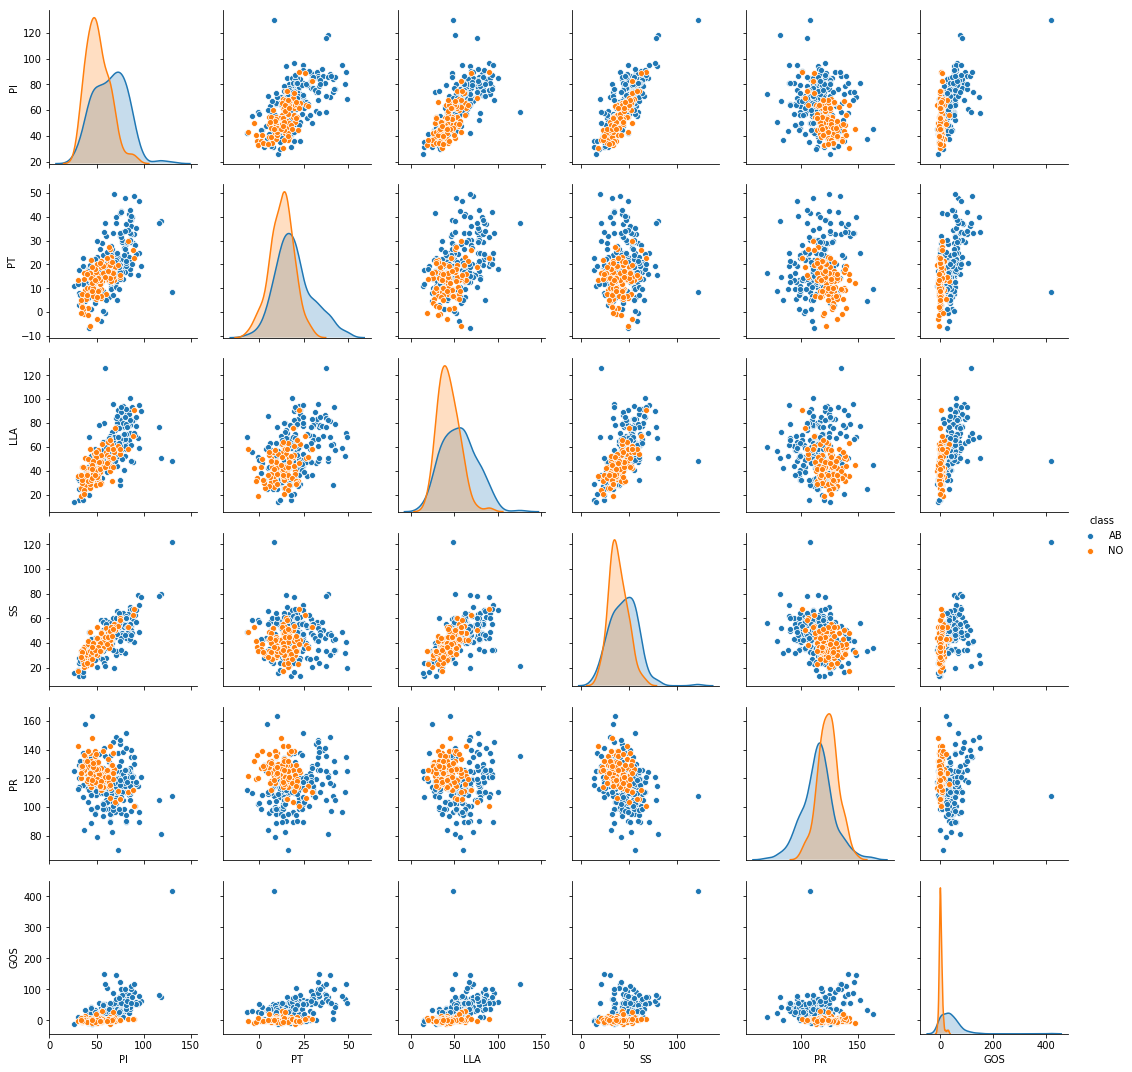

In [64]:
def b_2():
    plt.figure()
    sns.pairplot(data, hue="class",diag_kind="kde")
print ('The answer of the (b-1) is ')
b_2()

The answer of the (b-2 and b-3) is 
The shape of training set is 
(210, 7)
The shape of test set is 
(100, 7)
The train data set look like this 
         PI     PT    LLA      SS      PR     GOS class
210   38.51  16.96  35.11   21.54  127.63    7.99    NO
211   54.92  18.97  51.60   35.95  125.85    2.00    NO
212   44.36   8.95  46.90   35.42  129.22    4.99    NO
213   48.32  17.45  48.00   30.87  128.98   -0.91    NO
214   45.70  10.66  42.58   35.04  130.18   -3.39    NO
215   30.74  13.35  35.90   17.39  142.41   -2.01    NO
216   50.91   6.68  30.90   44.24  118.15   -1.06    NO
217   38.13   6.56  50.45   31.57  132.11    6.34    NO
218   51.62  15.97  35.00   35.66  129.39    1.01    NO
219   64.31  26.33  50.96   37.98  106.18    3.12    NO
220   44.49  21.79  31.47   22.70  113.78   -0.28    NO
221   54.95   5.87  53.00   49.09  126.97   -0.63    NO
222   56.10  13.11  62.64   43.00  116.23   31.17    NO
223   69.40  18.90  75.97   50.50  103.58   -0.44    NO
224   89.83  22

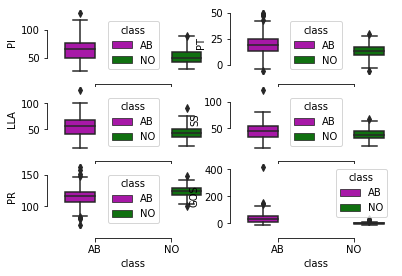

In [65]:
def b_3():
    plt.figure()
    plt.subplot(321)
    sns.boxplot(x='class', y='PI', hue="class", palette=["m", "g"],
                data=data)
    sns.despine(offset=10, trim=True)
    plt.subplot(322)
    sns.boxplot(x='class', y='PT', hue="class", palette=["m", "g"],
                data=data)
    sns.despine(offset=10, trim=True)
    plt.subplot(323)
    sns.boxplot(x='class', y='LLA', hue="class", palette=["m", "g"],
                data=data)
    sns.despine(offset=10, trim=True)
    plt.subplot(324)
    sns.boxplot(x='class', y='SS', hue="class", palette=["m", "g"],
                data=data)
    sns.despine(offset=10, trim=True)
    plt.subplot(325)
    sns.boxplot(x='class', y='PR', hue="class", palette=["m", "g"],
                data=data)
    sns.despine(offset=10, trim=True)

    plt.subplot(326)
    sns.boxplot(x='class', y='GOS', hue="class", palette=["m", "g"],
                data=data)
    sns.despine(offset=10, trim=True)

    train, test = train_test_sample(210)
    y_train, y_test, train_1, test_1= data_preprocessing(train, test)
    print('The shape of training set is ')
    print(train.shape)
    print('The shape of test set is ')
    print(test.shape)
    print('The train data set look like this ')
    print(train)
print ('The answer of the (b-2 and b-3) is ')
b_3()

The answer of the (c-2) is 
The best k is 4 and the lowest error is 0.060000
The confusion matrix is
[[25  5]
 [ 1 69]]
The Ture positive rate is 0.833333
The Ture negative rate is 0.985714
precision is 0.961538
The f1 score is 0.892857
The lowest train error is 0.000000


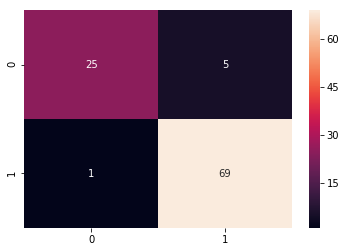

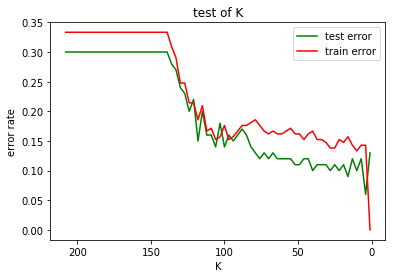

In [66]:
def c_2_1():
    k_ = range(1, 211,3)
    train, test = train_test_sample(210)
    y_train, y_test, train_1, test_1 = data_preprocessing(train, test)
    error_c_2_1  =[]
    error_c_2_1_train = []
    for i in range(len(k_)):
        knn = KNeighborsClassifier(n_neighbors=k_[i], metric='euclidean')
        knn.fit(train_1, y_train)
        y_pred = knn.predict(test_1)
        # print('TEST : The k is %d, and the error rate is %.2f' % (k_[i],zero_one_loss(y_test, y_pred)))
        error_c_2_1.append(zero_one_loss(y_test, y_pred))

    best_k = k_[error_c_2_1.index(min(error_c_2_1))]
    knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
    knn.fit(train_1, y_train)
    y_pred = knn.predict(test_1)
    print('The best k is %d and the lowest error is %f' % (best_k, zero_one_loss(y_test, y_pred)))
    result_deduction(y_test,y_pred)
    for i in range(len(k_)):
        knn = KNeighborsClassifier(n_neighbors=k_[i], metric='euclidean')
        knn.fit(train_1, y_train)
        y_pred_train = knn.predict(train_1)
        # print('TRAIN: The k is %d, and the error rate is %.2f' % (k_[i],zero_one_loss(y_train, y_pred_train)))
        error_c_2_1_train.append(zero_one_loss(y_train, y_pred_train))

    print('The lowest train error is %f' % (min(error_c_2_1_train)))
    plt.figure()
    plt.plot(k_, error_c_2_1,color='green',label='test error')
    plt.plot(k_, error_c_2_1_train,color='red', label='train error')
    plt.gca().invert_xaxis()
    plt.title('test of K')
    plt.xlabel('K')
    plt.ylabel('error rate')
    plt.legend()
print ('The answer of the (c-2) is ')
c_2_1()

The answer of the (c-3) is 


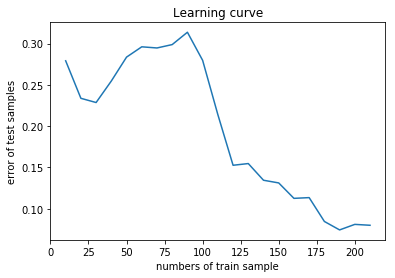

In [67]:
def c_3_1():
    c_3_rate = []
    c_3_rate_lowest = []

    for i in range(len(n)):
#         print('n is %d' % (n[i]))
        train, test = train_test_sample(n[i])
        y_train, y_test, train_1, test_1 = data_preprocessing(train, test)
        c_3_rate = []
        k_ = range(1, len(train_1), 5)
#         print (max(k_))
        for j in range(len(k_)):
            knn = KNeighborsClassifier(n_neighbors=k_[j], metric='euclidean')
            knn.fit(train_1, y_train)
            y_pred = knn.predict(test_1)
            c_3_rate.append(zero_one_loss(y_test, y_pred))
        c_3_rate_lowest.append(min(c_3_rate))

    plt.figure()
    plt.title('Learning curve')
    plt.xlabel('numbers of train sample')
    plt.ylabel('error of test samples')
    plt.plot(n, c_3_rate_lowest)
print ('The answer of the (c-3) is ')
c_3_1()

In [68]:
def d_1():
    p = []
    log_p_1 = []
    log_p = range(1, 11, 1)
    for i in range(len(log_p)):
        log_p_1.append(log_p[i] / 10)
        p.append(math.pow(10, log_p_1[i]))
    k_d = range(1,211,5)
    x = PrettyTable(["matrix", "k*", "error rate"])

    error_d_1 = []
    for i in range(len(k_d)):

        knn = KNeighborsClassifier(n_neighbors=k_d[i], metric='manhattan')
        train, test = train_test_sample(210)
        y_train, y_test, train_1, test_1 = data_preprocessing(train, test)
        knn.fit(train_1, y_train)
#         print (train_1)
        y_pred = knn.predict(test_1)
        # print('The k is %d, and the error rate (zero one loss) is %.2f' % (k_d[i],zero_one_loss(y_test, y_pred)))
        error_d_1.append(1-accuracy_score(y_test, y_pred) )
    best_k_d = k_d[error_d_1.index(min(error_d_1))]

    x.add_row(["manhattan", best_k_d, min(error_d_1)])
#     print(error_d_1)

    error_d_1 = []   # find the p and error rate log
    for j in range(len(p)):
        knn = KNeighborsClassifier(n_neighbors=best_k_d, p=p[j], metric='minkowski')
        train, test = train_test_sample(210)
        y_train, y_test, train_1, test_1 = data_preprocessing(train, test)
        knn.fit(train_1, y_train)
        y_pred = knn.predict(test_1)
        error_d_1.append(zero_one_loss(y_test, y_pred))
        # print (log_p_1[j],error_d_1[j])  #for check
    best_log10_p = log_p_1[error_d_1.index(min(error_d_1))]
    print ('The best log10(p) is %f with the lowest error rate %.5f'%(best_log10_p,min(error_d_1)))

    error_d_1 = []
    for i in range(len(k_d)):
        knn = KNeighborsClassifier(n_neighbors=k_d[i], metric='chebyshev')
        train, test = train_test_sample(210)
        y_train, y_test, train_1, test_1 = data_preprocessing(train, test)
        knn.fit(train_1, y_train)
        y_pred = knn.predict(test_1)
        # print('The k is %d, and the error rate (zero one loss) is %.2f' % (k_d[i],zero_one_loss(y_test, y_pred)))
        error_d_1.append(zero_one_loss(y_test, y_pred))
    best_k_d = k_d[error_d_1.index(min(error_d_1))]
    x.add_row(["chebyshev", best_k_d, min(error_d_1)])
#     print(error_d_1)

    error_d_1 = []
    for i in range(len(k_d)):
        train, test = train_test_sample(210)
        y_train, y_test, train_1, test_1 = data_preprocessing(train, test)
        V = np.cov(train_1.astype(float).T)
        knn = KNeighborsClassifier(n_neighbors=k_d[i],metric='mahalanobis',metric_params={'V': V}).fit(train_1, y_train)
        y_pred = knn.predict(test_1)
        # print('The k is %d, and the error rate (zero one loss) is %.2f' % (k_d[i],zero_one_loss(y_test, y_pred)))
        error_d_1.append(zero_one_loss(y_test, y_pred))
    best_k_d = k_d[error_d_1.index(min(error_d_1))]
    # print ('The best k is %d with the lowest error is %f when we want Mahalanobis distance with convariance matrix V'%(best_k_d,min(error_d_1)))
    x.add_row(["mahalanobis", best_k_d, min(error_d_1)])
    print (x)
#     print(error_d_1)
    
print ('The answer of the (d) is ')
d_1()

The answer of the (d) is 
The best log10(p) is 0.600000 with the lowest error rate 0.06000
+-------------+----+---------------------+
|    matrix   | k* |      error rate     |
+-------------+----+---------------------+
|  manhattan  | 6  | 0.10999999999999999 |
|  chebyshev  | 16 | 0.07999999999999996 |
| mahalanobis | 1  | 0.17000000000000004 |
+-------------+----+---------------------+


In [69]:
def e():
    k_d = range(1,211,5)
    x = PrettyTable(["matrix", "k* wighted by distance", "error rate"])

    error_d_1 = []
    for i in range(len(k_d)):
        train, test = train_test_sample(210)
        y_train, y_test, train_1, test_1 = data_preprocessing(train, test)
        knn = KNeighborsClassifier(n_neighbors=k_d[i], metric='euclidean', weights='distance').fit(train_1, y_train)
        y_pred = knn.predict(test_1)
        # print('The k is %d, and the error rate (zero one loss) is %.2f' % (k_d[i],zero_one_loss(y_test, y_pred)))
        error_d_1.append(zero_one_loss(y_test, y_pred))
    best_k_d = k_d[error_d_1.index(min(error_d_1))]
    # print ('The best k is %d with the lowest error is %f when we want Mahalanobis distance with convariance matrix V'%(best_k_d,min(error_d_1)))
    x.add_row(["euclidean", best_k_d, min(error_d_1)])

    error_d_1 = []
    for i in range(len(k_d)):
        knn = KNeighborsClassifier(n_neighbors=k_d[i],weights='distance',metric='manhattan')
        train, test = train_test_sample(210)
        y_train, y_test, train_1, test_1 = data_preprocessing(train, test)
        knn.fit(train_1, y_train)
        y_pred = knn.predict(test_1)
        # print('The k is %d, and the error rate (zero one loss) is %.2f' % (k_d[i],zero_one_loss(y_test, y_pred)))
        error_d_1.append(zero_one_loss(y_test, y_pred))
#     print (error_d_1)
    best_k_d = k_d[error_d_1.index(min(error_d_1))]
    # print ('The best k is %d with the lowest error is %f when we want Manhattan distance with p becomes 1'%(best_k_d,min(error_d_1)))
    x.add_row(["manhattan", best_k_d, min(error_d_1)])

    error_d_1 = []
    for i in range(len(k_d)):
        knn = KNeighborsClassifier(n_neighbors=k_d[i], weights='distance',metric='chebyshev')
        train, test = train_test_sample(210)
        y_train, y_test, train_1, test_1 = data_preprocessing(train, test)
        knn.fit(train_1, y_train)
        y_pred = knn.predict(test_1)
        # print('The k is %d, and the error rate (zero one loss) is %.2f' % (k_d[i],zero_one_loss(y_test, y_pred)))
        error_d_1.append(zero_one_loss(y_test, y_pred))
    best_k_d = k_d[error_d_1.index(min(error_d_1))]
    # print ('The best k is %d with the lowest error is %f when we want Chebyshev distance with p becomes infinity'%(best_k_d,min(error_d_1)))
    x.add_row(["chebyshev", best_k_d, min(error_d_1)])
    print ('The answer of the (e) is ')
    print (x)
e()

The answer of the (e) is 
+-----------+------------------------+---------------------+
|   matrix  | k* wighted by distance |      error rate     |
+-----------+------------------------+---------------------+
| euclidean |           6            | 0.09999999999999998 |
| manhattan |           26           | 0.09999999999999998 |
| chebyshev |           16           | 0.10999999999999999 |
+-----------+------------------------+---------------------+


The lowest training error rate I achieved in this exercise is 0, shown in the function c_3_1()